In [1]:
# Core MSTICPy initialization for Notebooks
from msticpy.nbtools import nbinit
nbinit.init_notebook(namespace=globals());

# Load query providers (typically you'll be using just one)
qry_prov = QueryProvider("AzureSentinel")

Please wait. Loading Kqlmagic extension...


In [2]:
qry_prov.connect(WorkspaceConfig())

In [3]:
import entity_id as eid

In [4]:
e = eid.EntityIdentifier(qry_prov)

In [5]:
e.read_results()

In [6]:
e.show_entity_graph()

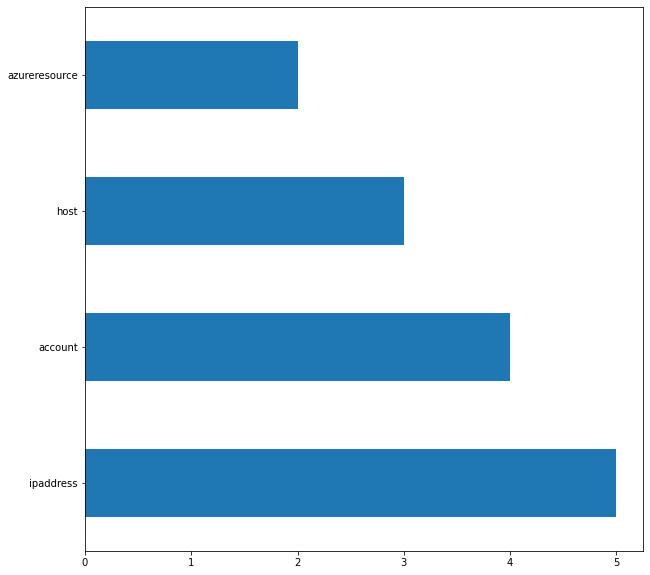

In [7]:
e.show_entity_dist()

In [9]:
e.show_single_entity_graph('account')

In [11]:
e.select_tables()

In [12]:
e.selected_tables.selected_items

['CommonSecurityLog', 'OfficeActivity', 'SecurityEvent', 'SigninLogs']

In [13]:
e.detect_entities()

100%|██████████| 4/4 [00:39<00:00,  9.92s/it]


{'ipaddress': [('CommonSecurityLog', 'DestinationIP'),
  ('CommonSecurityLog', 'SourceIP'),
  ('CommonSecurityLog', 'DestinationTranslatedAddress'),
  ('CommonSecurityLog', 'SourceTranslatedAddress'),
  ('OfficeActivity', 'ClientIP'),
  ('OfficeActivity', 'ClientIP_'),
  ('OfficeActivity', 'Client_IPAddress'),
  ('SecurityEvent', 'IpAddress'),
  ('SigninLogs', 'IPAddress')],
 'host': [('CommonSecurityLog', 'DestinationHostName'),
  ('OfficeActivity', 'OrganizationName'),
  ('SecurityEvent', 'Computer'),
  ('SigninLogs', 'Resource'),
  ('SigninLogs', 'ResourceGroup')],
 'account': [('CommonSecurityLog', 'SourceUserName'),
  ('OfficeActivity', 'UserId'),
  ('OfficeActivity', 'UserId_'),
  ('OfficeActivity', 'MailboxOwnerUPN'),
  ('OfficeActivity', 'MailboxOwnerSid'),
  ('OfficeActivity', 'LogonUserSid'),
  ('SecurityEvent', 'Account'),
  ('SecurityEvent', 'FilePath'),
  ('SecurityEvent', 'MandatoryLabel'),
  ('SecurityEvent', 'SubjectAccount'),
  ('SecurityEvent', 'SubjectUserSid'),
  ('

In [14]:
e.table_match_to_html('SigninLogs')

Column,Matches
TenantId,
ResourceId,"azureresource [p:0] (matched RESOURCEID_REGEX 100.0%, all rows 100.0%) file [p:2] (matched LXPATH_REGEX 100.0%, all rows 100.0%)"
CorrelationId,
Resource,"host [p:1] (matched DNS_REGEX 100.0%, all rows 100.0%)"
ResourceGroup,"host [p:1] (matched DNS_REGEX 100.0%, all rows 100.0%)"
AlternateSignInName,"account [p:0] (matched EMAIL_REGEX 100.0%, all rows 34.0%)"
AppId,
Id,
IPAddress,"ipaddress [p:0] (matched IPV6_REGEX 7.0%, all rows 7.0%)"
OriginalRequestId,


In [15]:
e.show_sankey()